In [2]:
from astropy.io import fits
import Annas_functions as anna
import constants as const
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from spectral_cube import SpectralCube
from astropy.wcs import WCS
import astropy.units as u

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Cambria'
plt.rcParams['font.size'] = 15

colors = sns.color_palette('colorblind', 10)

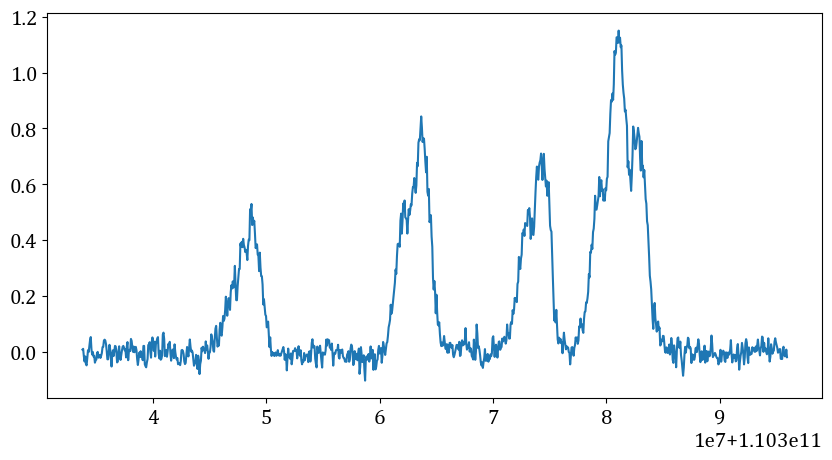

In [29]:
hdulist = fits.open(r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Thesis\data\i16293\Combined\tune_a\IRAS_16293-2422_a.spw16.fits")
header = hdulist[0].header

freq=(np.arange(header['NAXIS3'])-(header['CRPIX3']-1))*header['CDELT3']+header['CRVAL3']
theta_maj = header['BMAJ']*3600 #Major axis converted to arcsec
theta_min = header['BMIN']*3600 #Minor axis converted too arcsec
delta_v = header['CDELT3'] 

i,j = 79,79
intens = hdulist[0].data[0, :, j, i]  

plt.figure(figsize=(10,5))
plt.plot(freq, intens)

In [30]:
file = r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Thesis\Copy of Splatalolgue results.xlsx'

transitions = {
    "CH3CN 1": anna.read_excel_rotational(file, 'CDMS tune a', 'CH3CN', '6( 4)- 5( 4) F= 6- 5',),
    "CH3CN 4": anna.read_excel_rotational(file, 'CDMS tune a', 'CH3CN', '6(3)- 5(-3) F= 6- 5',),
    "CH3CN 10": anna.read_excel_rotational(file, 'CDMS tune a', 'CH3CN', '6( 2)- 5( 2) F= 6- 6'),
    "CH3CN 15": anna.read_excel_rotational(file, 'CDMS tune a', 'CH3CN', '6( 1)- 5( 1) F= 6- 6'),
    # "13CH3OH 1" : anna.read_excel_rotational(file, 'CDMS tune b', '13CH3OH', '2( -1, 2)- 1( -1, 1)'),
    # "13CH3OH 2" : anna.read_excel_rotational(file, 'CDMS tune b', '13CH3OH', '2( 0, 2)- 1( 0, 1) + +'),
    # "13CH3OH 3" : anna.read_excel_rotational(file, 'CDMS tune b', '13CH3OH', '2 ( 0 , 2)- 1 ( 0 , 1)'),
    # "13CH3OH 4" : anna.read_excel_rotational(file, 'CDMS tune b', '13CH3OH', '2 ( 1 , 1)- 1 ( 1 , 0)')    
    # "CH3OH 1" : anna.read_excel_rotational(file, 'CDMS tune b', 'CH3OH', '2( 1, 2)- 1( 1, 1) E'),
    # "CH3OH 2" : anna.read_excel_rotational(file, 'CDMS tune b', 'CH3OH', '2( 0, 2)- 1( 0, 1) A'),
    # "CH3OH 3" : anna.read_excel_rotational(file, 'CDMS tune b', 'CH3OH', '2(- 0, 2)- 1(- 0, 1) E'),
    # "CH3OH 4" : anna.read_excel_rotational(file, 'CDMS tune b', 'CH3OH', '2(- 1, 1)- 1(- 1, 0) E')
}


partitions = {
    "CH3CN": anna.read_partition(file,   'partition function', 'CH3CN'),
    "13CH3OH": anna.read_partition(file, 'partition function', '13CH3OH'),
    "CH3OH": anna.read_partition(file,   'partition function', 'CH3OH'),
}

In [31]:
t_values = [2.725, 5, 9.375, 18.75, 37.5, 75, 150, 225, 300, 500, 1000, 2000]
q_values = {molecule: [partitions[molecule][f'Q({t}K)'] for t in t_values] for molecule in partitions}

molecule_name = "CH3CN"
molecules_to_plot = [molecule_name]  # Add or remove molecule names as needed

filtered_q_values = {molecule: q_values[molecule] for molecule in molecules_to_plot if molecule in q_values}

# Convert to numpy arrays and filter out NaN values
filtered_q_values = {molecule: (np.array(vals, dtype=float), np.array(t_values, dtype=float)) for molecule, vals in filtered_q_values.items()}
filtered_q_values = {molecule: (vals[~np.isnan(vals)], temps[~np.isnan(vals)]) for molecule, (vals, temps) in filtered_q_values.items()}

def get_partition_function(molecule, temperature):
    if molecule not in q_values:
        raise ValueError(f"Molecule '{molecule}' not found in transitions.")
    
    q_vals = np.array(q_values[molecule], dtype=float)
    t_vals = np.array(t_values, dtype=float)
    
    # Filter out NaN values
    mask = ~np.isnan(q_vals)
    filtered_q_vals = q_vals[mask]
    filtered_t_vals = t_vals[mask]
    
    # Interpolate the partition function value for the given temperature
    partition_function_value = np.interp(temperature, filtered_t_vals, filtered_q_vals)
    
    return partition_function_value


In [32]:
Aij = []
Gu = []
eu = []
av_freq = []

for transition, params in transitions.items():
    Aul = np.array(params["Aul"])
    gu = np.array(params["gu"])
    Eu = np.array(params["Eu"])
    freq = np.array(params["frequency"])
    av_freq.append(freq)
    Aij.append(Aul)
    Gu.append(gu)
    eu.append(Eu)
    
A1, A2, A3, A4 = Aij[0], Aij[1], Aij[2], Aij[3]
gu1, gu2, gu3, gu4 = Gu[0], Gu[1], Gu[2], Gu[3]
eu1, eu2, eu3, eu4 = eu[0], eu[1], eu[2], eu[3]
av_freq_1, av_freq_2, av_freq_3, av_freq_4 = av_freq[0], av_freq[1], av_freq[2], av_freq[3]

# Integrated intensity

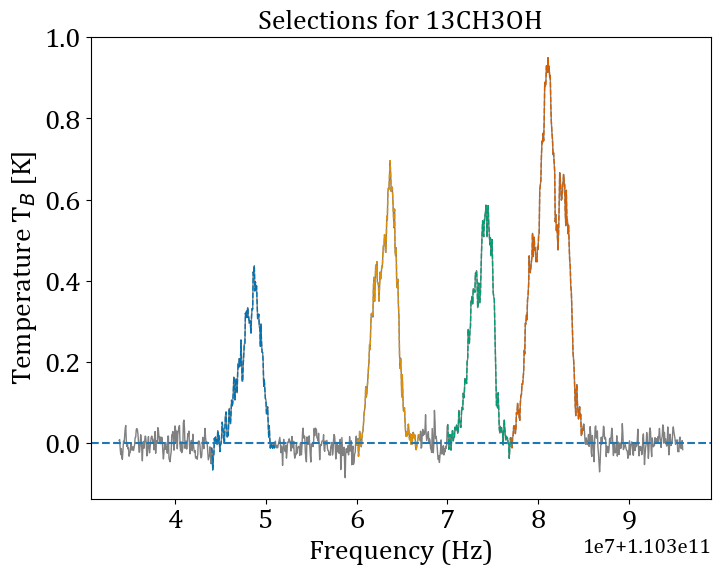

In [33]:
data_cube = hdulist[0].data
header = hdulist[0].header
wcs = WCS(header, naxis=2)
cube = SpectralCube.read(hdulist)

i = 79
j = 79

f_s_min_1 = 110.344
f_s_max_1 = 110.351

f_s_min_2 = 110.36
f_s_max_2 = 110.367

f_s_min_3 = 110.37
f_s_max_3 = 110.377

f_s_min_4 = 110.377
f_s_max_4 = 110.385

slab_signal_1 = cube.spectral_slab(f_s_min_1 * u.GHz, f_s_max_1 * u.GHz)
slab_signal_2 = cube.spectral_slab(f_s_min_2 * u.GHz, f_s_max_2 * u.GHz) 
slab_signal_3 = cube.spectral_slab(f_s_min_3 * u.GHz, f_s_max_3 * u.GHz)
slab_signal_4 = cube.spectral_slab(f_s_min_4 * u.GHz, f_s_max_4 * u.GHz)

temperature_all = anna.temperature_conversion(cube[:, i, j], theta_maj, theta_min, freq*1.e9)
temperature_signal_1 = anna.temperature_conversion(slab_signal_1[:, i, j], theta_maj, theta_min, av_freq_1*1.e9)
temperature_signal_2 = anna.temperature_conversion(slab_signal_2[:, i, j], theta_maj, theta_min, av_freq_2*1.e9)
temperature_signal_3 = anna.temperature_conversion(slab_signal_3[:, i, j], theta_maj, theta_min, av_freq_3*1.e9)
temperature_signal_4 = anna.temperature_conversion(slab_signal_4[:, i, j], theta_maj, theta_min, av_freq_4*1.e9)

plt.figure(figsize=(8,6))

plt.plot(cube.spectral_axis, temperature_all, c='gray', lw=1, linestyle='-', label='Full spectrum')
plt.plot(slab_signal_1.spectral_axis, temperature_signal_1, c=colors[0], lw=1, linestyle='--', label='Signal region')
plt.plot(slab_signal_2.spectral_axis, temperature_signal_2, c=colors[1], lw=1, linestyle='--', label='Signal region')
plt.plot(slab_signal_3.spectral_axis, temperature_signal_3, c=colors[2], lw=1, linestyle='--', label='Signal region')
plt.plot(slab_signal_4.spectral_axis, temperature_signal_4, c=colors[3], lw=1, linestyle='--', label='Signal region')

integrate_1 = np.nansum(temperature_signal_1.value)*delta_v
integrate_2 = np.nansum(temperature_signal_2.value)*delta_v
integrate_3 = np.nansum(temperature_signal_3.value)*delta_v
integrate_4 = np.nansum(temperature_signal_4.value)*delta_v
plt.xlabel('Frequency (Hz)', size=20)
plt.ylabel('Temperature T$_B$ [K]', size=20)
plt.title('Selections for 13CH3OH', size=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.axhline(y=0, linestyle='--')
# plt.savefig(r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Thesis\results\i16293\rotational_selections_13CH3OH.pdf", dpi=300, bbox_inches='tight')  

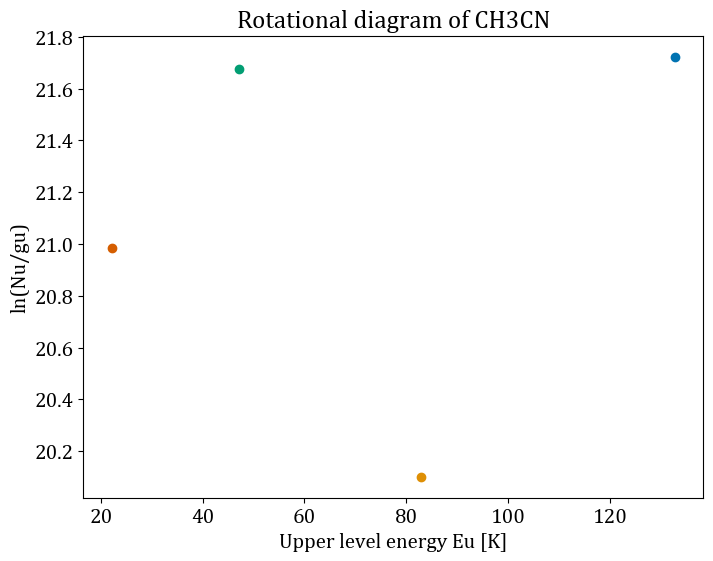

In [37]:
y1 = anna.ln_rotational_diagram(av_freq_1*1.e9, integrate_1, A1, gu1)
y2 = anna.ln_rotational_diagram(av_freq_2*1.e9, integrate_2, A2, gu2)
y3 = anna.ln_rotational_diagram(av_freq_3*1.e9, integrate_3, A3, gu3)
y4 = anna.ln_rotational_diagram(av_freq_4*1.e9, integrate_4, A4, gu4)

x1 = eu1
x2 = eu2
x3 = eu3
x4 = eu4

plt.figure(figsize=(8,6))
plt.scatter(x1, y1, c=colors[0])
plt.scatter(x2, y2, c=colors[1])
plt.scatter(x3, y3, c=colors[2])
plt.scatter(x4, y4, c=colors[3])

plt.xlabel('Upper level energy Eu [K]') 
plt.ylabel('ln(Nu/gu)')
plt.title('Rotational diagram of CH3CN')

# plt.savefig(r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Thesis\results\i16293\rotational_diagram_CH3CN.pdf", bbox_inches='tight', dpi=300)

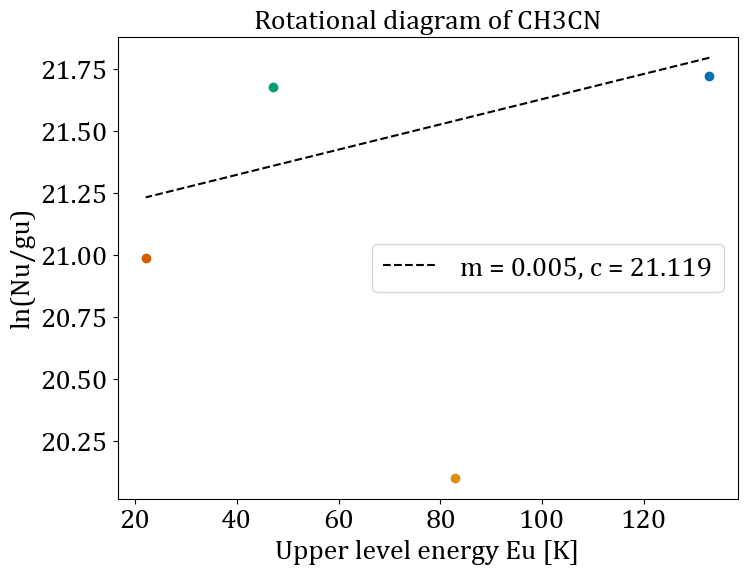

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(x1, y1, c=colors[0])
plt.scatter(x2, y2, c=colors[1])
plt.scatter(x3, y3, c=colors[2])
plt.scatter(x4, y4, c=colors[3])

def linear(x, m, c):
    return m*x + c

from scipy.optimize import curve_fit
x = np.array((x1, x3, x4))
y = np.array((y1, y3, y4))

popt, pcov = curve_fit(linear, x, y)
m, c = popt

plt.plot(x, linear(x, m, c), c='black', linestyle='--', label='m = {:.3f}, c = {:.3f}'.format(m, c))
plt.legend(fontsize=20)
plt.xlabel('Upper level energy Eu [K]', size=20)
plt.ylabel('ln(Nu/gu)', size=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Rotational diagram of CH3CN', size=20)

# plt.savefig(r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Thesis\results\i16293\rotational_diagram_CH3CN.pdf", bbox_inches='tight', dpi=300)

In [40]:
T = -1/m
Q = get_partition_function(molecule_name, T)
Ntot = np.exp(c)*Q
print("T:", T)
print("Q:", Q)
print("Ntot:", f'{Ntot:.2e}')

T: -196.6722661355276
Q: 14.0
Ntot: 2.08e+10
